<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 10px;"> 
# Principal Components Analysis - PCA


## Manual PCA Codealong

---

**MANUAL PCA STEPS:**

1. Standardize data: centering is required, but full normalization is nice for visuals later.
2. Calculate eigenvectors and eigenvalues from correlation or covariance matrix.
3. Sort eigenvalues and choose eigenvectors that correspond to the largest eigenvalues. The number you choose is up to you, but we will take 2 for the sake of visualization here.
4. Construct the projection weighting matrix $W$ from the eigenvectors.
5. Transform the original dataset $X$ with $W$ to obtain the new 2-dimensional transformed matrix $Z$.

---

**DATA**

We are going to be using a simple 75-row, 4-column dataset with demographic information. It contains:

    age (limited to 20-65)
    income
    health (a rating on a scale of 1-100, where 100 is the best health)
    stress (a rating on a scale of 1-100, where 100 is the most stressed)
    
All of the variables are continuous.

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style('white')

demo = pd.read_csv('simple_demographics.csv')

In [2]:
demo.head(3)

,age,health,income,stress
0,21,74,42746,53
1,33,64,72792,49
2,30,78,74178,64


### 1. Basic EDA

Make a seaborn regplot for:

1. age vs. income
2. age vs. health
3. age vs. stress
4. all of the features in one full graph

Check for correlation


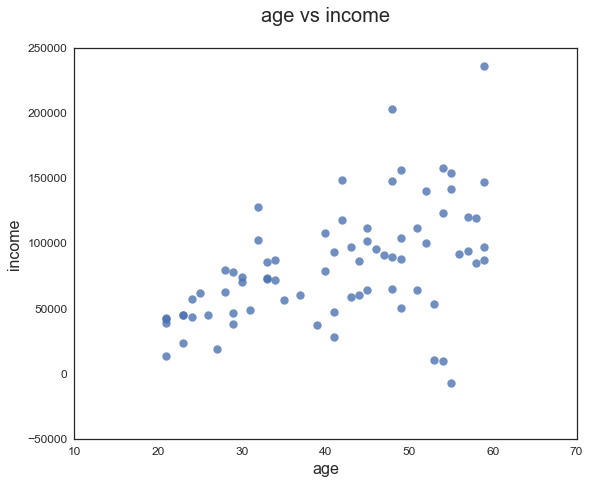

In [3]:
fig = plt.figure(figsize=(9,7))
ax = fig.gca()

ax = sns.regplot('age', 'income', data=demo, fit_reg=False, scatter_kws={'s':70}, ax=ax)
ax.set_ylabel('income', fontsize=16)
ax.set_xlabel('age', fontsize=16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('age vs income\n', fontsize=20)

plt.show()

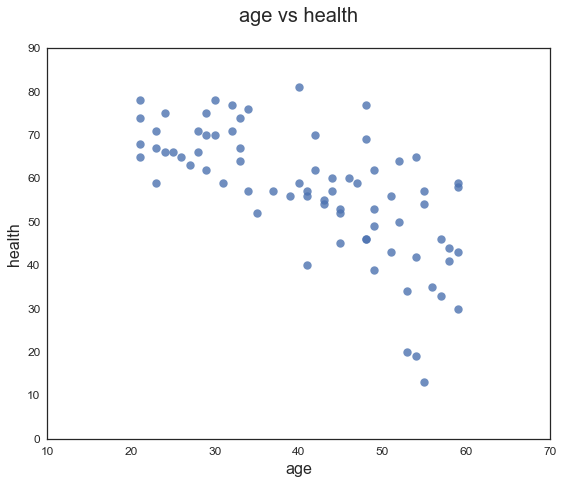

In [4]:
fig = plt.figure(figsize=(9,7))
ax = fig.gca()
ax = sns.regplot('age', 'health', data=demo, fit_reg=False, scatter_kws={'s':70}, ax=ax)

ax.set_ylabel('health', fontsize=16)
ax.set_xlabel('age', fontsize=16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('age vs health\n', fontsize=20)

plt.show()

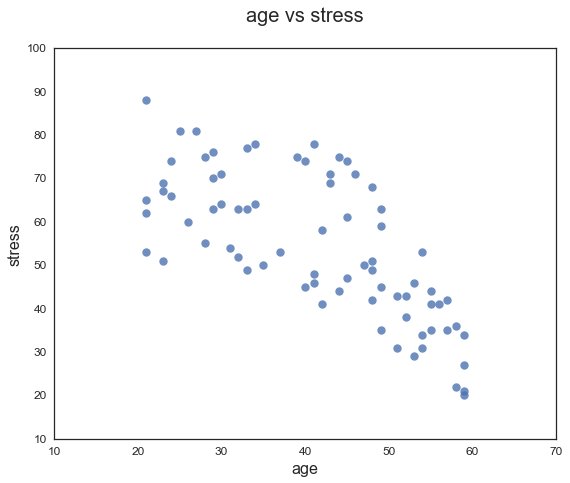

In [5]:
fig = plt.figure(figsize=(9,7))
ax = fig.gca()
ax = sns.regplot('age', 'stress', data=demo, fit_reg=False, scatter_kws={'s':70}, ax=ax)

ax.set_ylabel('stress', fontsize=16)
ax.set_xlabel('age', fontsize=16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('age vs stress\n', fontsize=20)

plt.show()


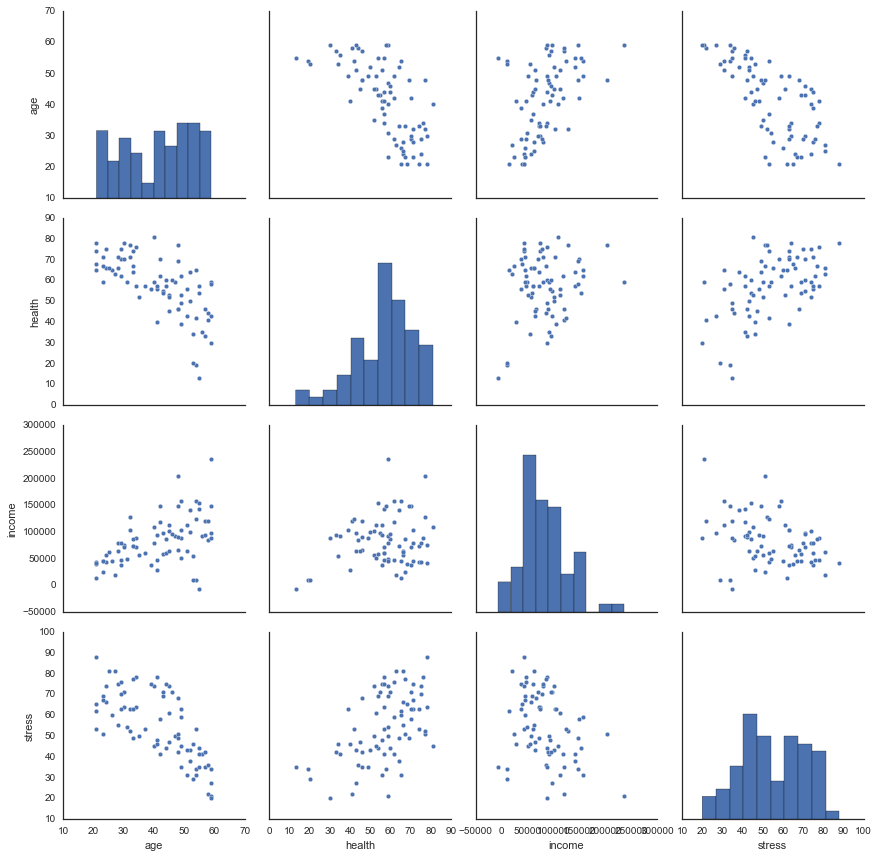

In [6]:
sns.pairplot(demo, size=3)
plt.show()

In [7]:
demo.corr()

,age,health,income,stress
age,1.000000,-0.674142,0.503590,-0.713347
health,-0.674142,1.000000,0.192037,0.527663
income,0.503590,0.192037,1.000000,-0.347925
stress,-0.713347,0.527663,-0.347925,1.000000


### 2. Subset and normalize

Subset data to just:

    income
    health
    stress

We will be comparing the principal components to age specifically so we are leaving them out.

---

In [8]:
demo_noage = demo[['health', 'income', 'stress']]
demo_noage = (demo_noage - demo_noage.mean()) / demo_noage.std()

### 3. Calculate correlation and covariance matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.


In [9]:
demo_noage_corr = np.corrcoef(demo_noage.values.T)
demo_noage.corr()

,health,income,stress
health,1.000000,0.192037,0.527663
income,0.192037,1.000000,-0.347925
stress,0.527663,-0.347925,1.000000


### 4. Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
    
---

In [10]:
eig_vals, eig_vecs = np.linalg.eig(demo_noage_corr)
print "Eigenvalues:\n" , eig_vals
print "\n======\n"
print "Eigenvector Matrix:\n", eig_vecs

Eigenvalues:
[ 0.26996948  1.55645677  1.17357375]


Eigenvector Matrix:
[[ 0.59525118 -0.6187659  -0.5126449 ]
 [-0.46791364  0.25173885 -0.84716255]
 [-0.65324793 -0.74414804  0.13968116]]


### 4. Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues. 

The explained variance tells us how much information (variance) is captured by each principal component.

$$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

---

In [11]:
var_exp = sorted( ((eig_vals) / (eig_vals.sum())* 100), reverse=True) 
var_exp

[51.881892276071454, 39.119125069425756, 8.9989826545027984]

In [12]:
## np.cumsum = returns the cumulative sum of the elements along a given axis.
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([  51.88189228,   91.00101735,  100.        ])

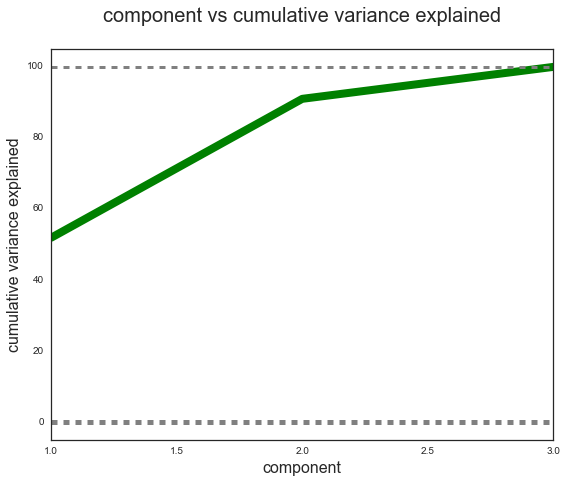

In [13]:
plt.figure(figsize=(9,7))

component_number = [1,2,3]

plt.plot(component_number, cum_var_exp, lw=8, color ='g')

plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')


ax = plt.gca()
ax.set_xlim([1,3])
ax.set_ylim([-5,105])

ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10) 
    
ax.set_title('component vs cumulative variance explained\n', fontsize=20)

plt.show()

### 5. Construct the Projection Matrix $W$

This is simply a matrix of our top 2 eigenvectors.

The eigenvectors are concatenated as columns.

1. Start by ordering the eigenvectors by their corresponding eigenvalues biggest to smallest.
- Concatenate the eigenvectors together. `np.hstack()` is useful for this.
    - `np.hstack()` takes a sequence of arrays and stack them horizontally to make a single array.

---

In [14]:
"""creating a list of the eig_vals and the eig_vecs"""
value_vector_pairs = [[eig_vals[i], eig_vecs[:,i]] for i in range(len(eig_vals))]
'''sort the values by eig_vals = biggest to smallest '''
value_vector_pairs.sort(reverse=True)
value_vector_pairs

[[1.5564567682821437, array([-0.6187659 ,  0.25173885, -0.74414804])],
 [1.1735737520827727, array([-0.5126449 , -0.84716255,  0.13968116])],
 [0.269969479635084, array([ 0.59525118, -0.46791364, -0.65324793])]]

In [15]:
'''Here is the projection Matrix'''
weight_2d_projection = np.hstack((value_vector_pairs[0][1].reshape(eig_vecs.shape[1],1),
                                  value_vector_pairs[1][1].reshape(eig_vecs.shape[1],1)))

print 'Weight data 2d PCA projection matrix:\n', weight_2d_projection

Weight data 2d PCA projection matrix:
[[-0.6187659  -0.5126449 ]
 [ 0.25173885 -0.84716255]
 [-0.74414804  0.13968116]]


### 6. Construct the Transformed 2D Matrix $Z$

- To do this, we take the dot product of our 3D demographic matrix $X$ with the projection matrix $W$
- PC1 is the first column in $Z$, and PC2 is the second.


---

In [16]:
Z = demo_noage.dot(weight_2d_projection)
Z.rename(columns={0: 'PC1', 1: 'PC2'}, inplace=True)

In [17]:
Z.head(10)

,PC1,PC2
0,-0.882350,0.150070
1,-0.104542,-0.102205
2,-1.372329,-0.496715
3,-0.867671,-0.797774
4,1.566225,-0.491018
5,-1.191162,0.469946
6,0.370695,-0.267250
7,0.775634,-1.484910
8,0.168786,-0.270120
9,-0.799486,0.478053


### 7. Plot Principal Component 1 vs 2

- Remember that PC1 is the first column in $Z$, and PC2 is the second.

- Notice how they are un-correlated.

---

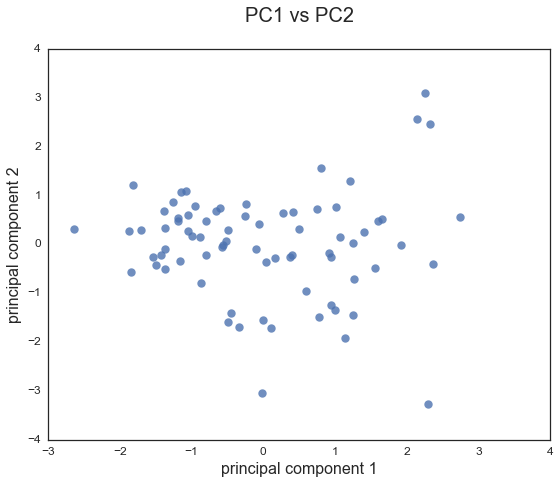

In [18]:
fig = plt.figure(figsize=(9,7))

ax = fig.gca()
ax = sns.regplot(Z.PC1, Z.PC2,
                 fit_reg=False, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('principal component 2', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs PC2\n', fontsize=20)

plt.show()

### 8. Plot age vs principal component 1 with regplot

Look how tight the relationship is. PC1 took the shared variance out of income, health, and stress, which are intuitively directly related to increasing age. 

This principal component, or more specifically the column weighting matrix $W$, is essentially **capturing the latent age variance embedded in these variables.**

---

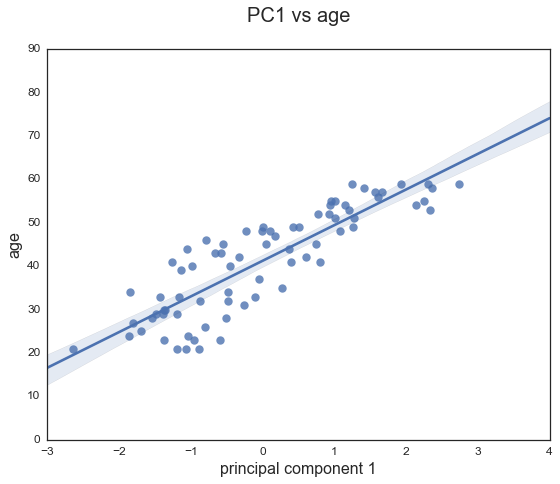

In [19]:
fig = plt.figure(figsize=(9,7))
ax = fig.gca()
ax = sns.regplot(Z.PC1, demo.age.values,
                 fit_reg=True, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('age', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs age\n', fontsize=20)

plt.show()

### 9. Concatenate PC1 and PC2 to the full demographic (4D) dataset, then melt it with PC1 and PC2 and index variables

1. Re-normalize so that all 4 variables are on the same scale.
2. Remember the pandas melt code:

```python
melted_df = pd.melt(df, id_vars=['PC1','PC2'])
```

---

In [20]:
demo_pcs = demo.copy()

demo_pcs = (demo - demo.mean()) / demo.std()

demo_pcs['PC1'] = Z.PC1
demo_pcs['PC2'] = Z.PC2

In [21]:
demo_pcs = pd.melt(demo_pcs, id_vars=['PC1','PC2'])

In [1]:
demo_pcs.head(100)

NameError: name 'demo_pcs' is not defined

In [23]:
demo_pcs.variable.value_counts()

income    75
health    75
age       75
stress    75
Name: variable, dtype: int64

### 10. Use lmplot to check out PC1 vs all 4 variables

Make the `col` keyword argument "variable" and the `hue` keyword argument "variable" as well, assuming that's what you called them in the melt command (those are the defaults).

Make `col_wrap = 2` and `size = 7` or something to make it nice.

---

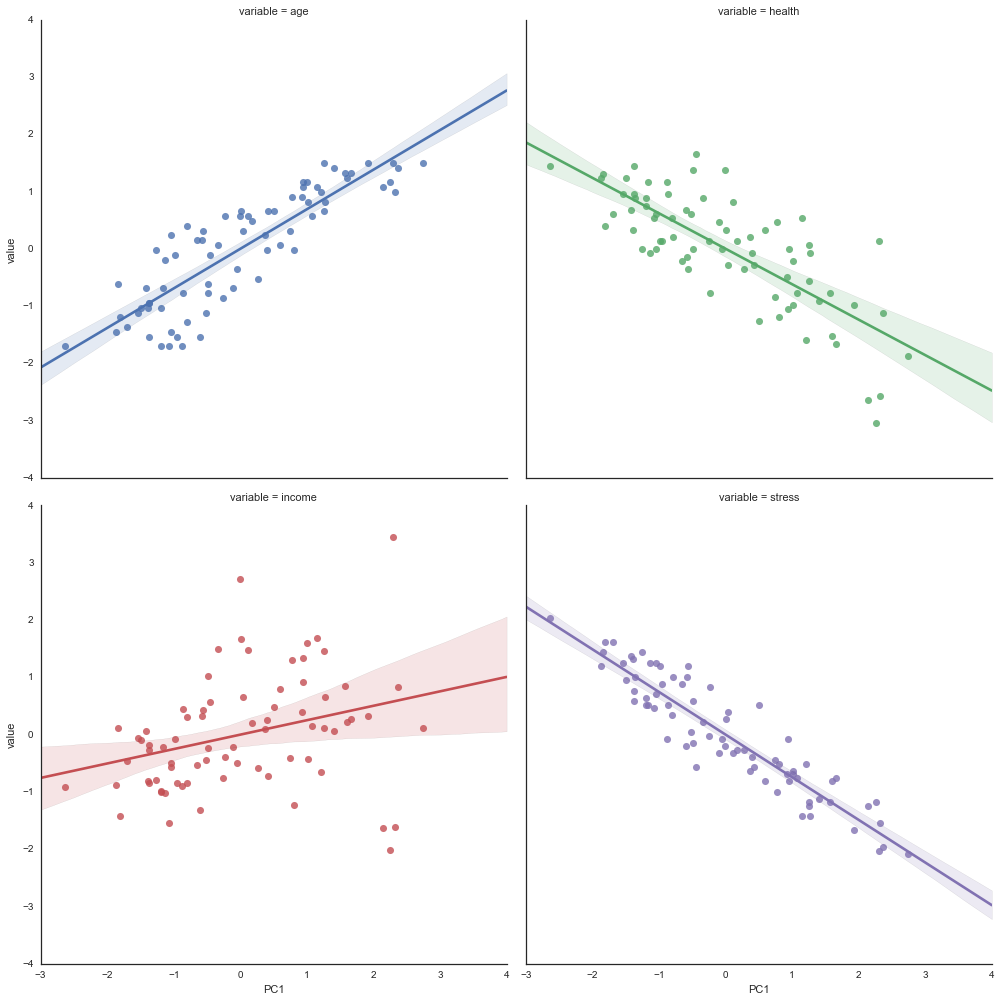

In [24]:
pc1 = sns.lmplot(x="PC1", y="value", col="variable", hue="variable", 
                 data=demo_pcs, col_wrap=2, size=7, scatter_kws={'s':50})

### 11. Use lmplot to do the same for PC2

Notice how PC2 captures the variance of income, which was not captured well by PC1. This makes sense, as the variance each principal component captures has to be orthogonal to the other components.

---

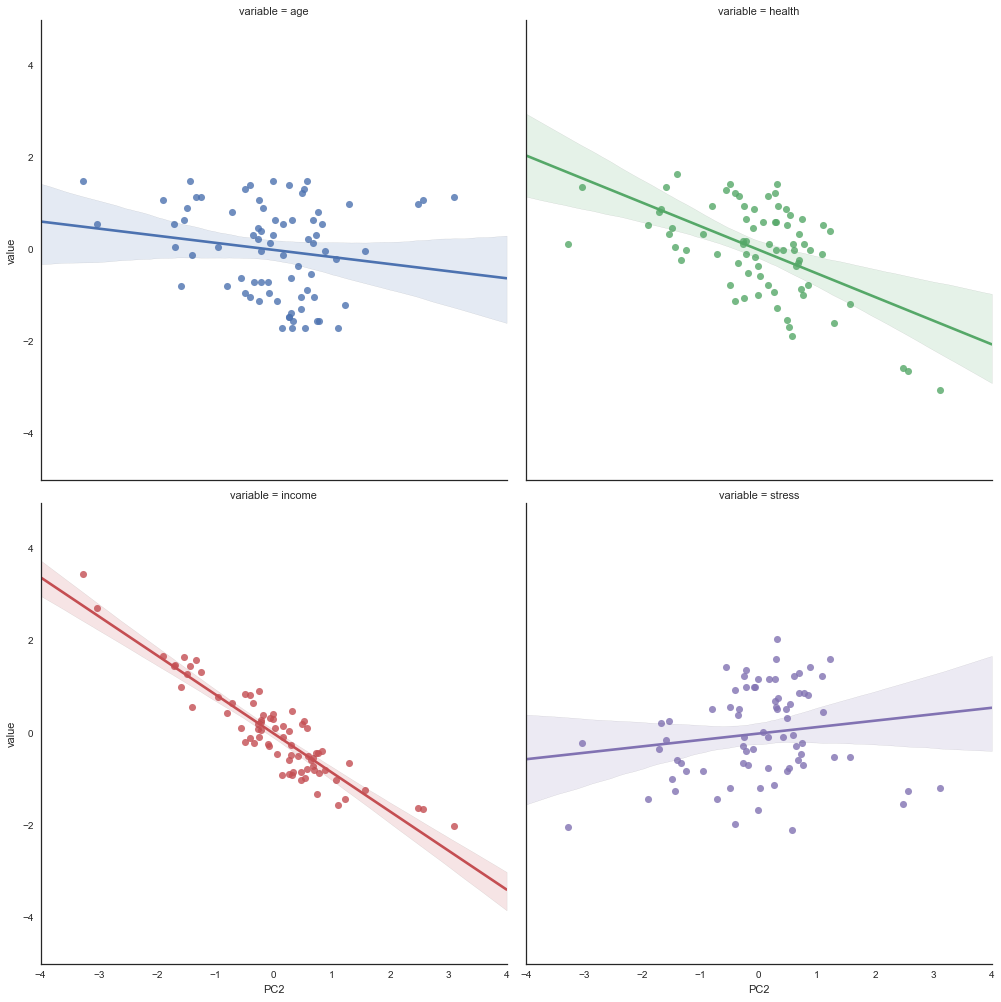

In [25]:
pc2 = sns.lmplot(x="PC2", y="value", col="variable", hue="variable", 
                 data=demo_pcs, col_wrap=2, size=7, scatter_kws={'s':50})